# Task 2- Sales prediction using python

## Data Science

## __VIKAS CHAUDHARY__

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
174,175,222.4,3.4,13.1,11.5
99,100,135.2,41.7,45.9,17.2
197,198,177.0,9.3,6.4,12.8
178,179,276.7,2.3,23.7,11.8
136,137,25.6,39.0,9.3,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.rename(columns={"Unnamed: 0" : "Other"},inplace="True")

In [7]:
df[df["Sales"]>25]

,Other,TV,Radio,Newspaper,Sales
36,37,266.9,43.8,5.0,25.4
98,99,289.7,42.3,51.2,25.4
147,148,243.2,49.0,44.3,25.4
175,176,276.9,48.9,41.8,27.0
183,184,287.6,43.0,71.8,26.2
198,199,283.6,42.0,66.2,25.5


## Data visuallisation

In [8]:
import seaborn as sbn
import matplotlib.pyplot as plt

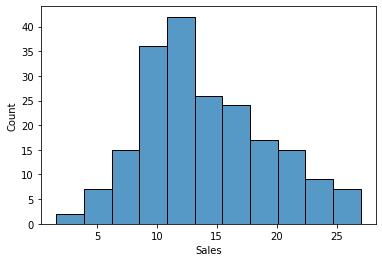

In [9]:
sbn.histplot(data=df,x="Sales")
plt.show()

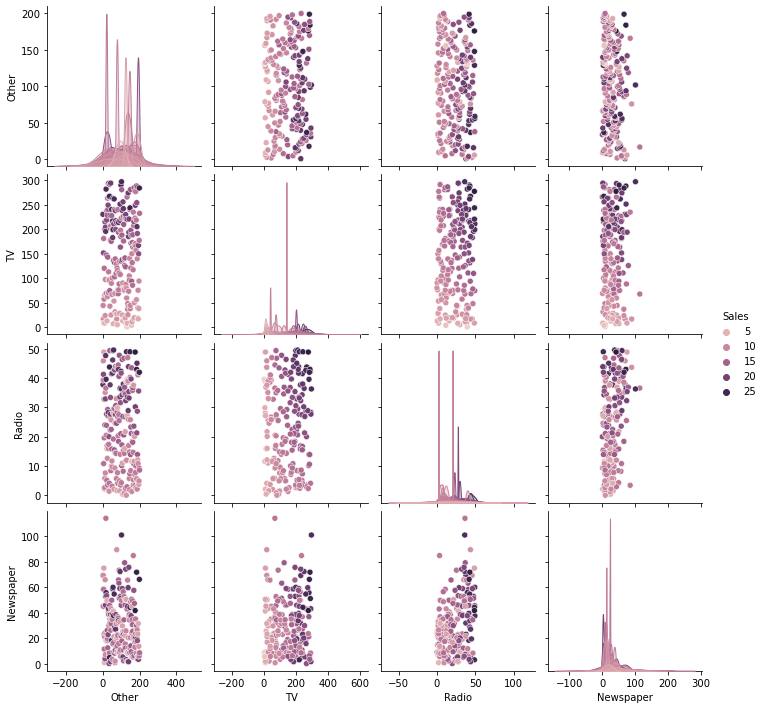

In [10]:
sbn.pairplot(data=df,hue="Sales")
plt.show()

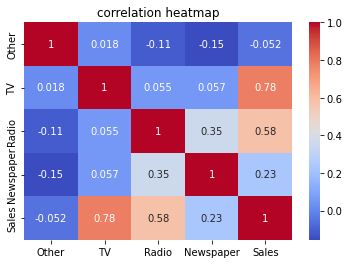

In [11]:
df.corr()
sbn.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

from the above heatmap we can say that sales from advetising through TV more.Number of Sales is directly proportional to the advertising through the TV


## feature and label set

In [13]:
x=df.drop(columns="Sales")
y=df["Sales"]

In [16]:
x.head(5)

,Other,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [17]:
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
x_train.describe()

,Other,TV,Radio,Newspaper
count,160.00000,160.000000,160.000000,160.000000
mean,96.95625,143.584375,24.431250,31.666875
std,55.12631,86.507985,14.994964,21.832665
min,2.00000,0.700000,0.000000,0.900000
25%,52.50000,68.850000,11.600000,14.650000
50%,94.50000,141.600000,25.650000,26.700000
75%,143.50000,216.500000,37.625000,45.325000
max,199.00000,296.400000,49.600000,114.000000


In [23]:
x_test.describe()

,Other,TV,Radio,Newspaper
count,40.000000,40.000000,40.000000,40.000000
mean,114.675000,160.875000,18.595000,26.102500
std,66.682711,82.796435,13.420382,21.247497
min,1.000000,8.400000,0.300000,0.300000
25%,44.750000,97.900000,7.600000,8.650000
50%,125.000000,173.600000,17.550000,23.150000
75%,174.250000,230.600000,26.875000,36.075000
max,200.000000,290.700000,49.000000,84.800000


## Model building

In [24]:
from sklearn.metrics import r2_score

In [25]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
scores=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [35]:
np.argmax(scores)

92

In [36]:
scores[(np.argmax(scores))]

0.9509833392692769

In [41]:
scores=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=92)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

# Testing different models

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
print(mean_absolute_error(y_test,y_pred))

0.9432601511887686


In [50]:
print(mean_squared_error(y_test,y_pred))

1.513940531140165


In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print(mean_absolute_error(y_test,rfr_pred))

0.5510249999999988


In [63]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
print(mean_absolute_error(y_test,rd_pred))

0.9432716688667734


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
print(mean_absolute_error(y_test,gbr_pred))

0.5293453237338696


In [65]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
print(mean_absolute_error(y_test,knr_pred))

1.8950000000000002


AFTER TESTING THE ABOVE MODELS WE FOUND THAT THE "GradientBoostingRegressor" MODEL IS PERFORMING BEST.
HENCE WE WILL USE THIS MODEL FOR PREDICTION

In [66]:
gbr_pred

array([10.21493668, 13.08509244,  9.29603024, 19.47671038, 12.7147328 ,
       15.63146096,  9.26741372, 12.31867821,  9.33484041,  6.91888242,
       12.04845278,  8.42905602, 24.34587905, 20.64575473, 16.31030886,
       14.81038985, 12.81856546, 24.46679643, 25.35602582,  6.35021762,
       10.36195425, 21.84887471, 16.35978795, 19.18131493, 10.84775513,
        7.04103248, 20.57662824, 19.75496071, 16.21081423, 11.27541534,
       15.09580134, 11.51441578, 16.81086994, 11.80662056,  5.1276114 ,
       19.73688216, 15.00732071, 25.83642502, 11.94806369, 15.40063602])

In [67]:
y_test

38     10.1
116    12.2
24      9.7
176    20.2
63     14.0
26     15.0
32      9.6
31     11.9
34      9.5
91      7.3
7      13.2
44      8.5
36     25.4
141    19.2
194    17.3
123    15.2
115    12.6
61     24.2
183    26.2
22      5.6
6      11.8
0      22.1
89     16.7
68     18.9
82     11.3
172     7.6
137    20.8
124    19.7
40     16.6
73     11.0
103    14.7
96     11.7
74     17.0
94     11.5
8       4.8
104    20.7
171    14.5
175    27.0
165    11.9
62     15.7
Name: Sales, dtype: float64

# Sample output of our program

In [72]:
data=[[125,155.2,61.7,85.9]]
columns=["Other","TV","Radio","Newspaper"]
df1=pd.DataFrame(data,columns=columns)

In [73]:
gbr.predict(df1)

array([19.30190064])